In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
df = pd.read_csv('D:\infosysspringboard projects\project1-1stmilestine\AZURE_BACKEND_TEAM-B\data\processed\cleaned_merged.csv')

# Display basic information about the dataset
print("Dataset shape:", df.shape)
print("\nColumn names:")
print(df.columns.tolist())
print("\nData types:")
print(df.dtypes)


# Convert 'date' to datetime and sort
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date').reset_index(drop=True)



Dataset shape: (1080, 9)

Column names:
['date', 'region', 'resource_type', 'usage_cpu', 'usage_storage', 'users_active', 'economic_index', 'cloud_market_demand', 'holiday']

Data types:
date                    object
region                  object
resource_type           object
usage_cpu                int64
usage_storage            int64
users_active             int64
economic_index         float64
cloud_market_demand    float64
holiday                  int64
dtype: object


In [2]:
# Step 1: Calculate cpu_total (max CPU used per resource type)
# Assuming 'resource_type' and 'usage_cpu' columns exist in the dataset
cpu_max_per_resource = df.groupby('resource_type')['usage_cpu'].transform('max')

# Calculate CPU utilization as usage_cpu / cpu_total (max for that resource)
df['cpu_utilization'] = df['usage_cpu'] / cpu_max_per_resource

# Step 2: Calculate storage efficiency
# Calculate max storage used per resource_type
storage_max_per_resource = df.groupby('resource_type')['usage_storage'].transform('max')

# Calculate storage efficiency as usage_storage / max_storage for that resource
df['storage_efficiency'] = df['usage_storage'] / storage_max_per_resource

# Optional: Display first few rows to verify
df[['resource_type', 'usage_cpu', 'cpu_utilization', 'usage_storage', 'storage_efficiency']].head()

,resource_type,usage_cpu,cpu_utilization,usage_storage,storage_efficiency
0,VM,88,0.888889,1959,0.982447
1,Container,77,0.777778,1199,0.601003
2,Storage,76,0.767677,1582,0.794177
3,VM,93,0.939394,1356,0.680040
4,Storage,51,0.515152,1715,0.860944



Numeric columns for correlation analysis:
['usage_cpu', 'usage_storage', 'users_active', 'economic_index', 'cloud_market_demand', 'holiday', 'cpu_utilization', 'storage_efficiency']

Correlation Matrix:
                     usage_cpu  usage_storage  users_active  economic_index  \
usage_cpu             1.000000      -0.037326      0.024590       -0.058776   
usage_storage        -0.037326       1.000000     -0.059368       -0.022852   
users_active          0.024590      -0.059368      1.000000        0.003685   
economic_index       -0.058776      -0.022852      0.003685        1.000000   
cloud_market_demand   0.009332      -0.014129      0.005262        0.049356   
holiday              -0.017563       0.035318     -0.012593        0.039910   
cpu_utilization       1.000000      -0.037326      0.024590       -0.058776   
storage_efficiency   -0.037253       0.999998     -0.059363       -0.022842   

                     cloud_market_demand   holiday  cpu_utilization  \
usage_cpu    

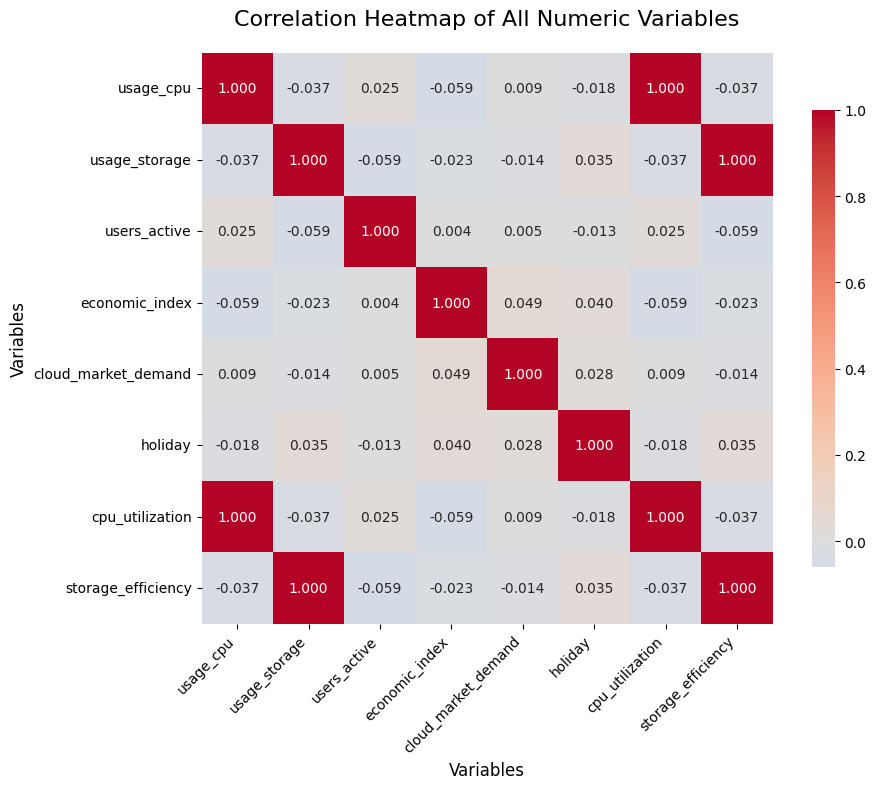

In [3]:

# Select only numeric columns for correlation analysis
numeric_columns = df.select_dtypes(include=[np.number]).columns
print("\nNumeric columns for correlation analysis:")
print(numeric_columns.tolist())

# Calculate correlation matrix
correlation_matrix = df[numeric_columns].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Create correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, 
            annot=True,           # Show correlation values
            cmap='coolwarm',      # Color scheme
            center=0,             # Center colormap at 0
            square=True,          # Make cells square
            fmt='.3f',            # Format numbers to 3 decimal places
            cbar_kws={'shrink': 0.8})

plt.title('Correlation Heatmap of All Numeric Variables', fontsize=16, pad=20)
plt.xlabel('Variables', fontsize=12)
plt.ylabel('Variables', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Optional: Save the heatmap as an image
# plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')


In [4]:
# Perform one-hot encoding using pandas get_dummies
df_encoded = pd.get_dummies(df, columns=['region', 'resource_type'], prefix=['region', 'resource_type'])

print(f"\nShape after encoding: {df_encoded.shape}")
print("\nNew columns created:")
new_columns = [col for col in df_encoded.columns if col.startswith(('region_', 'resource_type_'))]
print(new_columns)

# Display first few rows
print("\nFirst 5 rows with encoded columns:")
df_encoded[['date'] + new_columns].head()
# Convert boolean columns to integers (0/1) for better analysis
encoded_columns = [col for col in df_encoded.columns if col.startswith(('region_', 'resource_type_'))]
for col in encoded_columns:
    df_encoded[col] = df_encoded[col].astype(int)

print("✓ Encoded columns converted to integers (0/1):")


# CORRECT: Display as DataFrame (not print)
df_encoded[encoded_columns].head()


Shape after encoding: (1080, 16)

New columns created:
['region_East US', 'region_North Europe', 'region_Southeast Asia', 'region_West US', 'resource_type_Container', 'resource_type_Storage', 'resource_type_VM']

First 5 rows with encoded columns:
✓ Encoded columns converted to integers (0/1):


,region_East US,region_North Europe,region_Southeast Asia,region_West US,resource_type_Container,resource_type_Storage,resource_type_VM
0,1,0,0,0,0,0,1
1,0,0,1,0,1,0,0
2,0,0,1,0,0,1,0
3,0,0,1,0,0,0,1
4,0,1,0,0,0,1,0


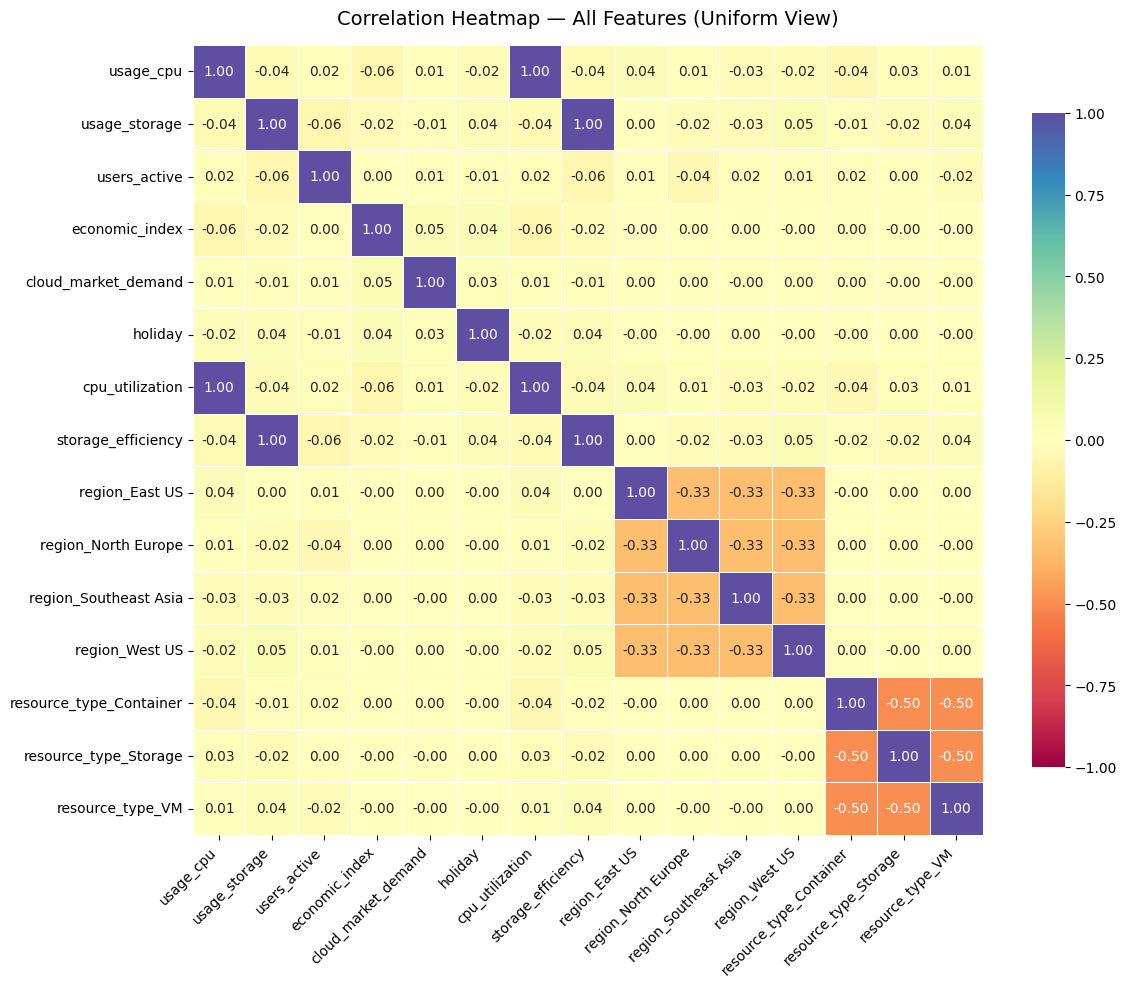

In [5]:


# Cell 3: Build correlation matrix
numeric_cols = df_encoded.select_dtypes(include=[np.number]).columns.tolist()
if 'date' in numeric_cols:
    numeric_cols.remove('date')

corr = df_encoded[numeric_cols].corr()

# Cell 4: Plot a neutral, uniform heatmap for all features
plt.figure(figsize=(12, 10))
sns.heatmap(corr,
            annot=True,
            cmap='Spectral',
            vmin=-1, vmax=1,
            center=0,
            square=True,
            fmt='.2f',
            linewidths=0.5,
            cbar_kws={'shrink':0.8})

plt.title('Correlation Heatmap — All Features (Uniform View)', fontsize=14, pad=15)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [6]:
df_encoded.head(5)
# List all feature columns and count
features = df_encoded.columns.tolist()
feature_count = len(features)

print(f"Total number of features: {feature_count}")
print("Features list:")
for feature in features:
    print(feature)

Total number of features: 16
Features list:
date
usage_cpu
usage_storage
users_active
economic_index
cloud_market_demand
holiday
cpu_utilization
storage_efficiency
region_East US
region_North Europe
region_Southeast Asia
region_West US
resource_type_Container
resource_type_Storage
resource_type_VM


In [7]:
df_encoded.head()
df=df_encoded

In [8]:
import os 

# -----------------------
# ARIMA Preparation
# -----------------------
# ARIMA expects a datetime index and a univariate time series (e.g., usage_cpu)
df_arima = df.set_index('date')

# Save ARIMA dataset (only datetime index and target column)



path = r'D:/infosysspringboard projects/project1-1stmilestine/AZURE_BACKEND_TEAM-B/data/processed/featured-dataset-specific models/'
filename = 'dataset_for_arima.csv'
full_path = os.path.join(path, filename)

full_path = os.path.join(path, filename)

# Create directory if it does not exist
os.makedirs(path, exist_ok=True)

# Save the dataframe
df_arima[['usage_cpu']].to_csv(full_path)
print(f"✓ File saved at {full_path}")

✓ File saved at D:/infosysspringboard projects/project1-1stmilestine/AZURE_BACKEND_TEAM-B/data/processed/featured-dataset-specific models/dataset_for_arima.csv


In [9]:

# -----------------------
# XGBoost Preparation
# -----------------------
# Extract datetime features
df_xgb = df.copy()
df_xgb['year'] = df_xgb['date'].dt.year
df_xgb['month'] = df_xgb['date'].dt.month
df_xgb['day'] = df_xgb['date'].dt.day
df_xgb['day_of_week'] = df_xgb['date'].dt.dayofweek
df_xgb['quarter'] = df_xgb['date'].dt.quarter
df_xgb['week_of_year'] = df_xgb['date'].dt.isocalendar().week
df_xgb['is_month_start'] = df_xgb['date'].dt.is_month_start.astype(int)
df_xgb['is_month_end'] = df_xgb['date'].dt.is_month_end.astype(int)
df_xgb['is_weekend'] = (df_xgb['day_of_week'] >= 5).astype(int)

# Drop the original date column, or keep if needed
df_xgb.drop(columns=['date'], inplace=True)

# Save for XGBoost training

# XGBoost dataset saving
xgb_path = r'D:/infosysspringboard projects/project1-1stmilestine/AZURE_BACKEND_TEAM-B/data/processed/featured-dataset-specific models/xgboost'
xgb_filename = 'dataset_for_xgboost.csv'
xgb_full_path = os.path.join(xgb_path, xgb_filename)

os.makedirs(xgb_path, exist_ok=True)

# Assuming df_xgb is prepared with datetime features and ready
df_xgb.to_csv(xgb_full_path, index=False)
print(f"✓ XGBoost dataset saved at {xgb_full_path}")

✓ XGBoost dataset saved at D:/infosysspringboard projects/project1-1stmilestine/AZURE_BACKEND_TEAM-B/data/processed/featured-dataset-specific models/xgboost\dataset_for_xgboost.csv


In [10]:
import os

# Assuming df is loaded and date converted to datetime
df_lstm = df.copy()
df_lstm['year'] = df_lstm['date'].dt.year
df_lstm['month'] = df_lstm['date'].dt.month
df_lstm['day'] = df_lstm['date'].dt.day
df_lstm['day_of_week'] = df_lstm['date'].dt.dayofweek
df_lstm['quarter'] = df_lstm['date'].dt.quarter
df_lstm['week_of_year'] = df_lstm['date'].dt.isocalendar().week
df_lstm['is_month_start'] = df_lstm['date'].dt.is_month_start.astype(int)
df_lstm['is_month_end'] = df_lstm['date'].dt.is_month_end.astype(int)
df_lstm['is_weekend'] = (df_lstm['day_of_week'] >= 5).astype(int)

# Directory for LSTM dataset
lstm_path = r'D:/infosysspringboard projects/project1-1stmilestine/AZURE_BACKEND_TEAM-B/data/processed/featured-dataset-specific models/lstm'
lstm_filename = 'dataset_for_lstm.csv'
lstm_full_path = os.path.join(lstm_path, lstm_filename)

# Create directory if not exists
os.makedirs(lstm_path, exist_ok=True)

# Save LSTM dataset (keeping date column)
df_lstm.to_csv(lstm_full_path, index=False)
print(f"✓ LSTM dataset saved at {lstm_full_path}")


✓ LSTM dataset saved at D:/infosysspringboard projects/project1-1stmilestine/AZURE_BACKEND_TEAM-B/data/processed/featured-dataset-specific models/lstm\dataset_for_lstm.csv


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# For ARIMA
import statsmodels.api as sm

# For XGBoost
from xgboost import XGBRegressor

# For LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler

def evaluate_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return rmse, mae, mape

def plot_predictions(y_true, y_pred, title):
    plt.figure(figsize=(10, 5))
    plt.plot(y_true, label='Actual')
    plt.plot(y_pred, label='Predicted')
    plt.title(title)
    plt.legend()
    plt.show()




def plot_predictions_with_dates(test_df, y_pred, date_col, actual_col, title):
    plt.figure(figsize=(12, 6))
    
    dates = pd.to_datetime(test_df[date_col])
    y_actual = test_df[actual_col]
    
    plt.plot(dates, y_actual, label='Actual CPU Usage', color='blue', linewidth=2)
    plt.plot(dates, y_pred, label='Predicted CPU Usage', color='red', linestyle='--', linewidth=2)
    
    plt.title(title, fontsize=14, fontweight='bold')
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('CPU Usage (%)', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Usage:
# plot_predictions_with_dates(X_test, preds_xgb, 'date', 'usage_cpu', 'XGBoost: Actual vs Predicted')


In [ ]:
# ---------- ARIMA Model Training and Evaluation -------------
df_arima = pd.read_csv(
    r'D:/infosysspringboard projects/project1-1stmilestine/AZURE_BACKEND_TEAM-B/data/processed/featured-dataset-specific models/dataset_for_arima.csv',
    parse_dates=['date'], index_col='date'
)

# Split data - 90% train, 10% test
train_size = int(len(df_arima) * 0.9)
train_arima, test_arima = df_arima[:train_size], df_arima[train_size:]

# Fit ARIMA model
model_arima = sm.tsa.ARIMA(train_arima['usage_cpu'], order=(5,1,0))
model_arima_fit = model_arima.fit()

# Forecast for test period
forecast_arima = model_arima_fit.forecast(steps=len(test_arima))
forecast_arima.index = test_arima.index

# Evaluate metrics
rmse_a, mae_a, mape_a = evaluate_metrics(test_arima['usage_cpu'], forecast_arima)
print(f'ARIMA - RMSE: {rmse_a:.3f}, MAE: {mae_a:.3f}, MAPE: {mape_a:.2f}%')

# Plot with dates for ARIMA
# Plot with dates for ARIMA (corrected function call)
plot_predictions_with_dates(test_arima.index, test_arima['usage_cpu'], forecast_arima, 'ARIMA: Actual vs Predicted CPU Usage')
# --

ARIMA - RMSE: 14.758, MAE: 12.678, MAPE: 17.74%


d:\infosysspringboard projects\project1-1stmilestine\azure_analytics\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\infosysspringboard projects\project1-1stmilestine\azure_analytics\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\infosysspringboard projects\project1-1stmilestine\azure_analytics\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\infosysspringboard projects\project1-1stmilestine\azure_analytics\lib\site-packages\statsmodels\tsa\base\t

TypeError: plot_predictions_with_dates() missing 1 required positional argument: 'title'

XGBoost - RMSE: 0.004, MAE: 0.000, MAPE: 0.00%


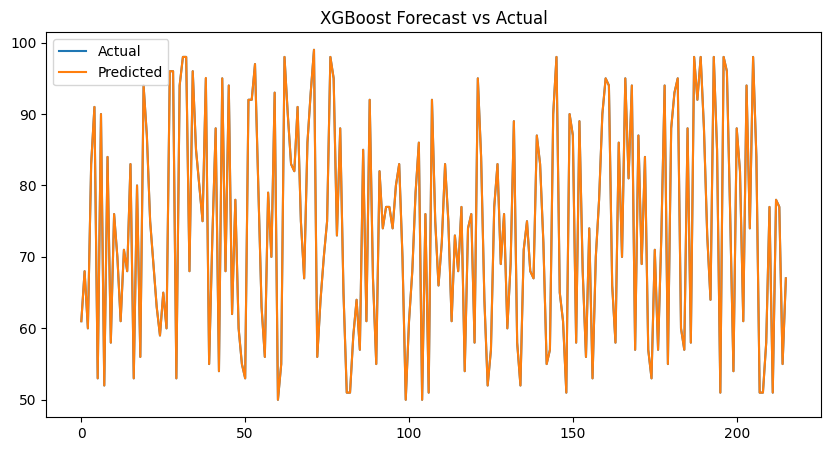

In [15]:
# ---------- XGBoost Model traiing and evalution-------------
df_xgb = pd.read_csv(r'D:\infosysspringboard projects\project1-1stmilestine\AZURE_BACKEND_TEAM-B\data\processed\featured-dataset-specific models\xgboost\dataset_for_xgboost.csv')

# Target and features
X = df_xgb.drop(columns=['usage_cpu'])
y = df_xgb['usage_cpu']

train_size = int(len(df_xgb) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

model_xgb = XGBRegressor(objective='reg:squarederror', n_estimators=100)
model_xgb.fit(X_train, y_train)
preds_xgb = model_xgb.predict(X_test)

rmse_x, mae_x, mape_x = evaluate_metrics(y_test, preds_xgb)
print(f'XGBoost - RMSE: {rmse_x:.3f}, MAE: {mae_x:.3f}, MAPE: {mape_x:.2f}%')
plot_predictions(y_test.values, preds_xgb, 'XGBoost Forecast vs Actual')

Epoch 1/50


d:\infosysspringboard projects\project1-1stmilestine\azure_analytics\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1510 - val_loss: 0.0910
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0887 - val_loss: 0.0928
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0880 - val_loss: 0.0834
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0937 - val_loss: 0.0936
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0878 - val_loss: 0.0868
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0882 - val_loss: 0.0850
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0862 - val_loss: 0.0840
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0903 - val_loss: 0.0836
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
LSTM - RMSE: 0.303, MAE: 0.261, MAPE: inf%


C:\Users\mahem\AppData\Local\Temp\ipykernel_12152\1966610104.py:21: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100


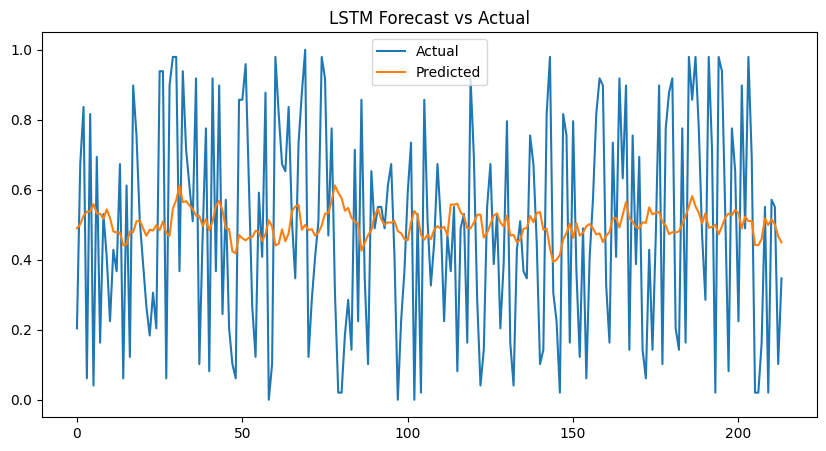

In [16]:
# ---------- LSTM Model Training and evalution-------------
df_lstm = pd.read_csv(r'D:\infosysspringboard projects\project1-1stmilestine\AZURE_BACKEND_TEAM-B\data\processed\featured-dataset-specific models\xgboost\dataset_for_xgboost.csv')

# Normalize features
feature_cols = [c for c in df_lstm.columns if c != 'usage_cpu' and c != 'date']
scaler = MinMaxScaler()
df_lstm[feature_cols + ['usage_cpu']] = scaler.fit_transform(df_lstm[feature_cols + ['usage_cpu']])

# Create sequences
def create_sequences(data, target_col, seq_length=10):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data.iloc[i:i+seq_length][feature_cols].values)
        y.append(data.iloc[i+seq_length][target_col])
    return np.array(X), np.array(y)

seq_length = 10
X_lstm, y_lstm = create_sequences(df_lstm, 'usage_cpu', seq_length)

train_size = int(len(X_lstm) * 0.8)
X_train_lstm, X_test_lstm = X_lstm[:train_size], X_lstm[train_size:]
y_train_lstm, y_test_lstm = y_lstm[:train_size], y_lstm[train_size:]

model_lstm = Sequential([
    LSTM(50, activation='relu', input_shape=(seq_length, len(feature_cols))),
    Dense(1)
])
model_lstm.compile(optimizer='adam', loss='mse')

early_stop = EarlyStopping(monitor='val_loss', patience=5)
model_lstm.fit(X_train_lstm, y_train_lstm, validation_split=0.2, epochs=50, batch_size=32, callbacks=[early_stop])

preds_lstm = model_lstm.predict(X_test_lstm).flatten()

rmse_l, mae_l, mape_l = evaluate_metrics(y_test_lstm, preds_lstm)
print(f'LSTM - RMSE: {rmse_l:.3f}, MAE: {mae_l:.3f}, MAPE: {mape_l:.2f}%')
plot_predictions(y_test_lstm, preds_lstm, 'LSTM Forecast vs Actual')